In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


# Load the dataset
file_path = 'archive\Data.csv'  # Adjusted for your username
data = pd.read_csv(file_path)

# Preview the data
print("First 5 rows of the dataset:")
print(data.head())

#Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
print("\nNumeric columns only:")
print(numeric_data.head())

#Check for missing values and fill them
print("\nMissing values in each column:")
print(numeric_data.isnull().sum())
numeric_data = numeric_data.fillna(numeric_data.mean())

# Normalize the data using StandardScaler
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(numeric_data)

# Normalize the data using MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(numeric_data)

# Convert back to DataFrame for easier use
data_standard_df = pd.DataFrame(data_standard, columns=numeric_data.columns)
data_minmax_df = pd.DataFrame(data_minmax, columns=numeric_data.columns)

# Save or preview the normalized data
print("\nStandard Scaled Data (first 5 rows):")
print(data_standard_df.head())

print("\nMinMax Scaled Data (first 5 rows):")
print(data_minmax_df.head())


First 5 rows of the dataset:
                                          image_name class  feature_0  \
0  video-jNQtRj6NGycZDEXpe-frame-002745-hD77p8GPo...  bike   0.592699   
1  video-Gfv3kbdf5KAYRtPcz-frame-003465-ZK64MTpDB...  bike   0.129109   
2  video-rYXSHjnEfuLmjE6Z4-frame-000282-9DsLzj8zD...  bike   0.197805   
3  video-Gfv3kbdf5KAYRtPcz-frame-003031-pN4SMGv4P...  bike   0.712441   
4  video-BjSfmxLQqCGjg8tya-frame-000645-gyu9wMM3z...  bike   0.585288   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.451727  -1.002004  -0.121421  -0.004720  -1.136993   1.756335   
1  -0.332358  -0.227406  -0.255327   0.219230  -0.666518   0.987676   
2  -0.429209  -0.088233  -0.117236   0.376269  -0.305559   1.064518   
3  -0.253060  -0.506600  -0.175965  -0.051375  -0.870011   1.164238   
4  -0.675755   0.040474   0.666216   0.534574  -0.122698   1.297833   

   feature_7  ...  feature_246  feature_247  feature_248  feature_249  \
0   1.126653  ...     1.391706  


Shape of data with 95% variance retained: (5000, 4)

Shape of data with 10 components: (5000, 10)


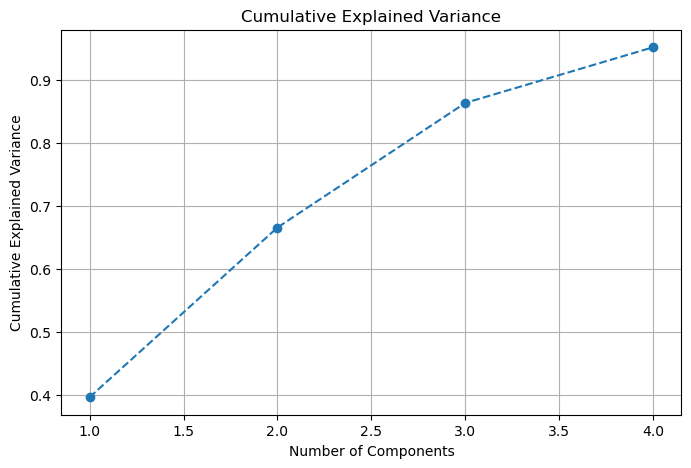


PCA with 95% variance (first 5 rows):
          0         1          2         3
0  4.639244 -1.483771  15.005828  1.084253
1  3.319983 -2.388531   7.758818  0.451416
2  1.941840 -0.362889   4.207155  2.060201
3  1.497658 -3.138381   7.742960 -2.584343
4  0.497759  2.567804   5.207260  2.709329

PCA with fixed components (first 5 rows):
          0         1          2         3         4         5         6  \
0  4.639244 -1.483771  15.005828  1.084253 -0.920187  0.971569  0.058182   
1  3.319983 -2.388531   7.758818  0.451416 -1.238596  0.353099 -0.926817   
2  1.941840 -0.362889   4.207155  2.060201 -0.260239 -1.625119 -0.698242   
3  1.497658 -3.138381   7.742960 -2.584343 -1.054213 -0.279591 -0.450852   
4  0.497759  2.567804   5.207260  2.709329  0.501737  0.669445 -0.756851   

          7         8         9  
0 -0.077195 -0.499655 -0.254379  
1  0.240471  0.070150  0.000671  
2 -0.549432  0.156601  0.006566  
3 -0.326787 -0.307018  0.484327  
4  0.183355 -0.051215  0.162870  

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use the Standard Scaled data for PCA
data_to_use = data_standard_df  # Choose StandardScaler or MinMaxScaler results

# PCA to retain 95% of variance
pca_95 = PCA(n_components=0.95)  # Retain 95% of variance
data_pca_95 = pca_95.fit_transform(data_to_use)

print(f"\nShape of data with 95% variance retained: {data_pca_95.shape}")

# PCA with a fixed number of components
fixed_components = 10  # You can adjust this number
pca_fixed = PCA(n_components=fixed_components)
data_pca_fixed = pca_fixed.fit_transform(data_to_use)

print(f"\nShape of data with {fixed_components} components: {data_pca_fixed.shape}")

#Explained Variance Ratio Plot
explained_variance = pca_95.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Save results
data_pca_95_df = pd.DataFrame(data_pca_95)
data_pca_fixed_df = pd.DataFrame(data_pca_fixed)

print("\nPCA with 95% variance (first 5 rows):")
print(data_pca_95_df.head())

print("\nPCA with fixed components (first 5 rows):")
print(data_pca_fixed_df.head())


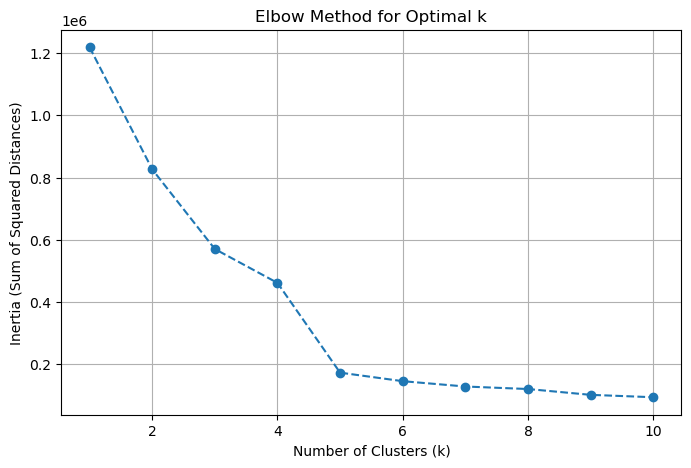

In [5]:
# Ensure all column names are strings
data_pca_95_df.columns = data_pca_95_df.columns.astype(str)

# Choose the dataset (PCA with 95% variance retained)
data_for_clustering = data_pca_95_df

# Use the Elbow Method to find the optimal number of clusters
inertia = []  # List to store sum of squared distances for each k
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid()
plt.show()


In [6]:
# Choose the optimal k (e.g., based on the "elbow" point)
optimal_k = 4  # Replace with your chosen value after analyzing the plot

# Perform K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

#  Add cluster labels to the dataset
data_pca_95_df['Cluster'] = clusters

print(f"\nCluster assignments with k={optimal_k} (first 5 rows):")
print(data_pca_95_df.head())\





Cluster assignments with k=4 (first 5 rows):
          0         1          2         3  Cluster
0  4.639244 -1.483771  15.005828  1.084253        2
1  3.319983 -2.388531   7.758818  0.451416        2
2  1.941840 -0.362889   4.207155  2.060201        2
3  1.497658 -3.138381   7.742960 -2.584343        2
4  0.497759  2.567804   5.207260  2.709329        2


Shape of data_pca_95_df: (5000, 5)


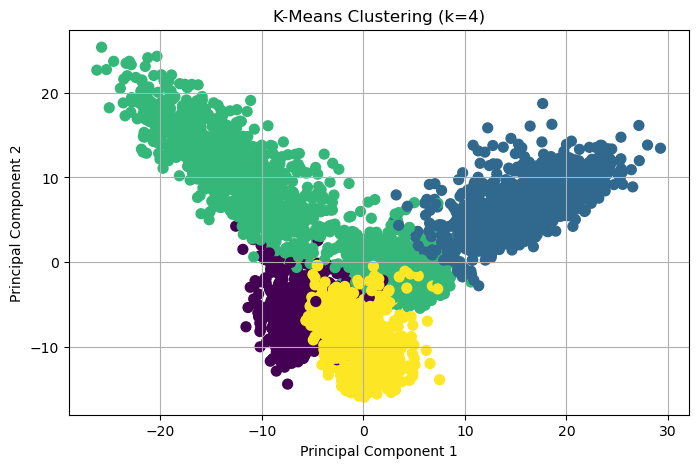

In [7]:
# Ensure cluster labels are properly assigned
if 'Cluster' not in data_pca_95_df.columns:
    print("Cluster column not found! Make sure clustering is performed before this cell.")
else:
    # Check the dimensions of the PCA-reduced dataset
    print("Shape of data_pca_95_df:", data_pca_95_df.shape)

    # Handle visualization based on dimensions
    if data_pca_95_df.shape[1] >= 2:  # At least 2 dimensions available
        plt.figure(figsize=(8, 5))
        plt.scatter(data_pca_95_df.iloc[:, 0], data_pca_95_df.iloc[:, 1], c=data_pca_95_df['Cluster'], cmap='viridis', s=50)
        plt.title('K-Means Clustering (k=4)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid()
        plt.show()
    elif data_pca_95_df.shape[1] == 3:  # 3D visualization
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_pca_95_df.iloc[:, 0], data_pca_95_df.iloc[:, 1], data_pca_95_df.iloc[:, 2],
                   c=data_pca_95_df['Cluster'], cmap='viridis', s=50)
        ax.set_title('K-Means Clustering (k=4)')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.show()
    else:
        print("Insufficient dimensions for plotting.")



In [8]:
# Analyze the distribution of data points in each cluster
print("Cluster distribution:")
print(data_pca_95_df['Cluster'].value_counts())


Cluster distribution:
Cluster
2    1998
0    1015
3    1007
1     980
Name: count, dtype: int64


In [9]:
# Save the clustered data to a CSV file
output_path = 'clustered_data.csv'  # Update the path if needed
data_pca_95_df.to_csv(output_path, index=False)
print(f"Clustered data saved to: {output_path}")


Clustered data saved to: clustered_data.csv


Agglomerative clustering completed. First 5 rows:
          0         1          2         3  Cluster  Agg_Cluster
0  4.639244 -1.483771  15.005828  1.084253        2            3
1  3.319983 -2.388531   7.758818  0.451416        2            3
2  1.941840 -0.362889   4.207155  2.060201        2            3
3  1.497658 -3.138381   7.742960 -2.584343        2            3
4  0.497759  2.567804   5.207260  2.709329        2            3


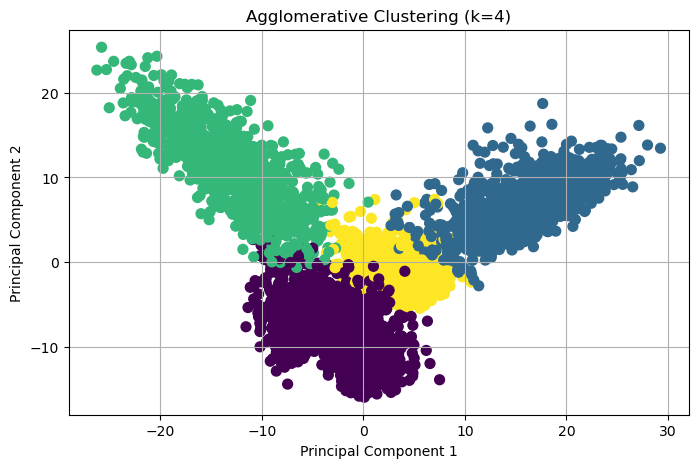

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with the same number of clusters (k=4)
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(data_pca_95_df.iloc[:, :-1])  # Exclude 'Cluster' column if present

# Add Agglomerative Clustering labels to the dataset
data_pca_95_df['Agg_Cluster'] = agg_clusters

print("Agglomerative clustering completed. First 5 rows:")
print(data_pca_95_df.head())

#Visualize the Agglomerative Clusters (for 2D PCA data)
plt.figure(figsize=(8, 5))
plt.scatter(data_pca_95_df.iloc[:, 0], data_pca_95_df.iloc[:, 1], c=data_pca_95_df['Agg_Cluster'], cmap='viridis', s=50)
plt.title('Agglomerative Clustering (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [11]:
# Analyze Agglomerative Clustering distribution
print("\nAgglomerative Clustering distribution:")
print(data_pca_95_df['Agg_Cluster'].value_counts())



Agglomerative Clustering distribution:
Agg_Cluster
0    2005
3    1033
1     984
2     978
Name: count, dtype: int64


In [12]:
from sklearn.metrics import adjusted_rand_score

# Compare clustering results using the Adjusted Rand Index
ari = adjusted_rand_score(data_pca_95_df['Cluster'], data_pca_95_df['Agg_Cluster'])
print(f"Adjusted Rand Index between K-Means and Agglomerative Clustering: {ari:.3f}")


Adjusted Rand Index between K-Means and Agglomerative Clustering: 0.586
